## PNR & XRR Fit example (Co/Pt on Sapphire)

We use the [anaklasis](https://github.com/alexandros-koutsioumpas/anaklasis) package to fit the Polarized-NR data (acquired at SuperAdam/ILL) and XRR data (MLZ/Garching) that come from a measurement of an air/Pt/Co/Al2O3 system. This set of measurments where acquired during the JCNS Neutron Scattering Labcourse in Greboble (2025). 

we first import *anaklasis.ref*

In [1]:
from anaklasis import ref

we then name the project, import input data, set _Q_ units in Angstrom (as they are in the input file) and also set the resolution of the instrument.

In [2]:
project='Co_Pt_NR_XRR'
in_file=[]
in_file.append('AlO3_Co_Pt_corrected.dat')
in_file.append('00058_du.dat')
in_file.append('00058_uu.dat')
units=['A','A','A'] # Angstrom units
resolution=[0.001,-1,-1] # dQ/Q constant for XRR, variable from file for NR

we then create our model where we just define the two layers between Air and Al2O3.

In [3]:
model = [
	# Re_sld Im_sld thk rough solv description
	[  0.0e-6, 0.0, 0, 'p0', 0.0, 'air'],
	[ 'm1', 'm2', 'p1', 'p2', 0.0, 'Pt'],
	[ 'm3+m0*p5', 'm4', 'p3', 'p4', 0.0, 'Co'],
	[ 'm5', 'm6',  0, 0.0, 0.0, 'Al2O3'],
	]

We have a single model in the system covering uniformly the whole substrate (single patch), so

In [4]:
system=[model]
patches=[1.0]

we have entered 6 parameters in total in the model. Let's define their bounds together with their descriptions. Note that we consider that all parameters have a uniform probability to assume a value between the declared bounds.

In [1]:
global_param = [
    # param  min  max  description type
    ['p0', 0, 10, 'air/Pt roughness','uniform'],
    ['p1', 10, 100, 'Pt thickness','uniform'],
    ['p2', 0, 10, 'Pt/Co roughness','uniform'],
    ['p3', 50, 250, 'Co thickness','uniform'],
    ['p4', 0, 10, 'Co/Al2O3 roughness','uniform'],
    ['p5', 3.55e-6, 4.331345e-6, 'Co_magnetic_sld', 'uniform'] # assuming no saturation of the Co layer
	]

we have no constraints to declare on the parameters

In [6]:
constraints = []

In addition to the free parameters defined above, we define 7 multiparameters that may have different values for each acquired curve. They mostly concern the real or imaginary part of the sld of the different layers (as found in the literature) and are all fixed for each curve.

In [7]:
multi_param = [
    ['m0',  0.0, 0.0, -1.0, -1.0, 1.0, 1.0, 'up/down','uniform'],
    ['m1',  1.37e-04, 1.37e-04, 6.24996e-6, 6.24996e-6, 6.24996e-6, 6.24996e-6, 'Pt_sld','uniform'],
    ['m2',  13.55e-06, 13.55e-06, 0.00186e-6, 0.00186e-6, 0.00186e-6, 0.00186e-6, 'Pt_Im_sld','uniform'],
    ['m3',  62.60e-06, 62.60e-06, 2.26454e-6, 2.26454e-6, 2.26454e-6, 2.26454e-6, 'Co_sld','uniform'],
    ['m4',  9.06e-06, 9.06e-06, 0.00940e-6, 0.00940e-6, 0.00940e-6, 0.00940e-6, 'Co_Im_sld','uniform'],
    ['m5',  33.40e-06, 33.40e-06, 5.71528e-6, 5.71528e-6, 5.71528e-6, 5.71528e-6, 'Al2O3_sld','uniform'],
    ['m6',  0.38e-06, 0.38e-06, 0.00003e-6, 0.00003e-6, 0.00003e-6, 0.00003e-6, 'Al2O3_Im_sld','uniform'],
    ] # no multi-parameters

We then leave the scale and the background a bit free to vary during the refinement

In [8]:
background = [[0.0,1.0e-3,'uniform'],
             [0.0,1.0e-5,'uniform'],
             [0.0,1.0e-5,'uniform']]
scale = [[0.9,1.1,'uniform'],
        [0.9,1.1,'uniform'],
        [0.9,1.1,'uniform']]

Then we set the fit details and call the _ref.fit_ function to perform the data refinement

--------------------------------------------------------------------
Program ANAKLASIS - Fit Module for X-ray/Neutron reflection datasets
version 1.6.0, September 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------
Project name: Co_Pt_NR_XRR
Using chi / R squared figure of merit (FOM)
Slow fit mode. Using large differential evolution population size
No parameter uncertainty estimation will be performed
A plot summarizing results will pop-up after the end of the calculation


Directory already exists.. overwriting data..
file#0 experimental points: 471
Q units in inverse A
dQ/Q =  0.001
fit weight:  1
file#1 experimental points: 121
Q units in inverse A
dQ/Q pointwise
fit weight:  1
file#2 experimental points: 116
Q units in inverse A
dQ/Q pointwise
fit weight:  1
free parameters =  12


list of free parameters: p0 (air/Pt roughness),p1 (Pt thickness)

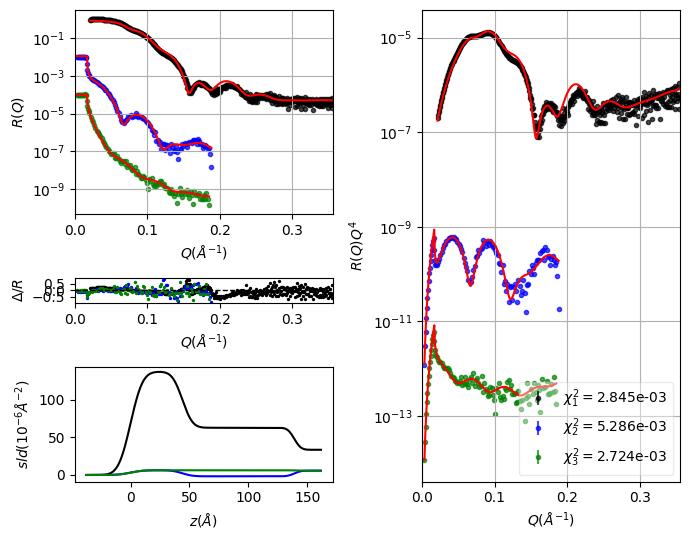

--------------------------------------------------------------------
Final model parameters
--------------------------------------------------------------------


Curve #0


Instrumental Resolution, dQ/Q: 0.001
fit weigth: 1
--------------------------------------------------------------------
air real sld (10^-6 A^-2)      = 0.00 (fixed)
air imaginary sld (10^-6 A^-2) = 0.00 (fixed)
air thickness (A)              = 0.00 (fixed)
air/Pt roughness (A) = 8.12 (parametric), -> p0
air solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
Pt real sld (10^-6 A^-2)      = 137.00 (parametric), -> m1
Pt imaginary sld (10^-6 A^-2) = 13.55 (parametric), -> m2
Pt thickness (A)              = 43.98 (parametric), -> p1
Pt/Co roughness (A) = 6.83 (parametric), -> p2
Pt solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
Co real sld (10^-6 A^-2)      = 62.60 (parametric), -> m3+m0*p5
Co im

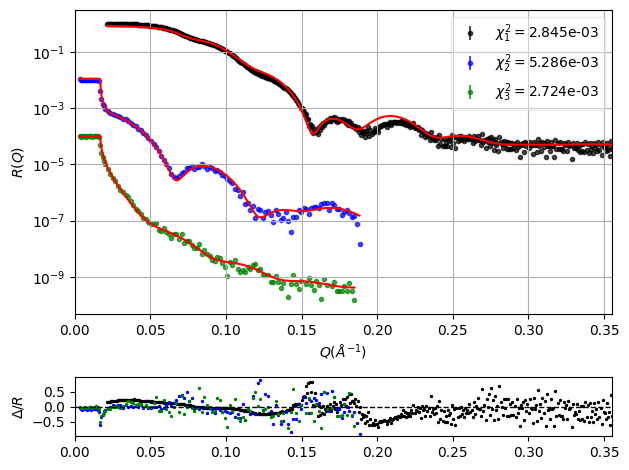

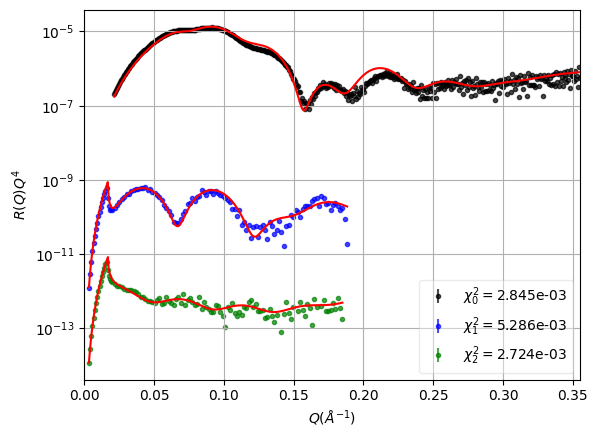

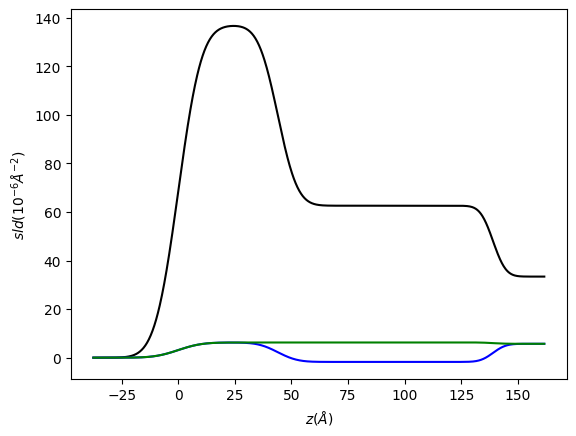

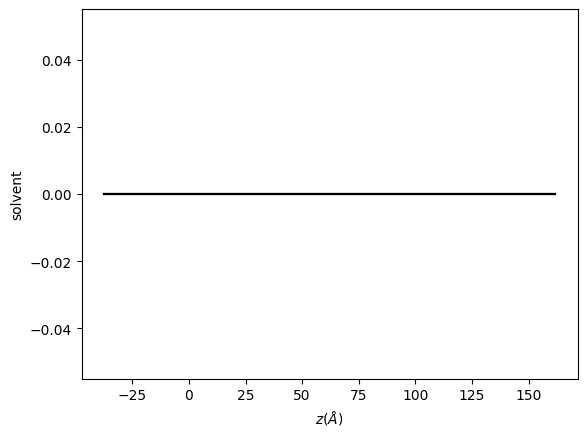

In [9]:
fit_mode=0 # using FOM1
fit_weight=[1,1,1] 
method = 'simple' # Uncertainty estimated through Hessian matrix

res = ref.fit(project, in_file, units, fit_mode,
fit_weight,method,resolution,patches, system,
global_param,multi_param, constraints,
background,scale,experror=False,fast=False)